In [4]:
#import panda packages
import pandas as pd

#Read Data from CSV file And Store It IN DATAFRAME
df = pd.read_csv('FB_2.csv')

#print TOP 10 RECORD
df.head(10)
df.shape

(2431, 7)

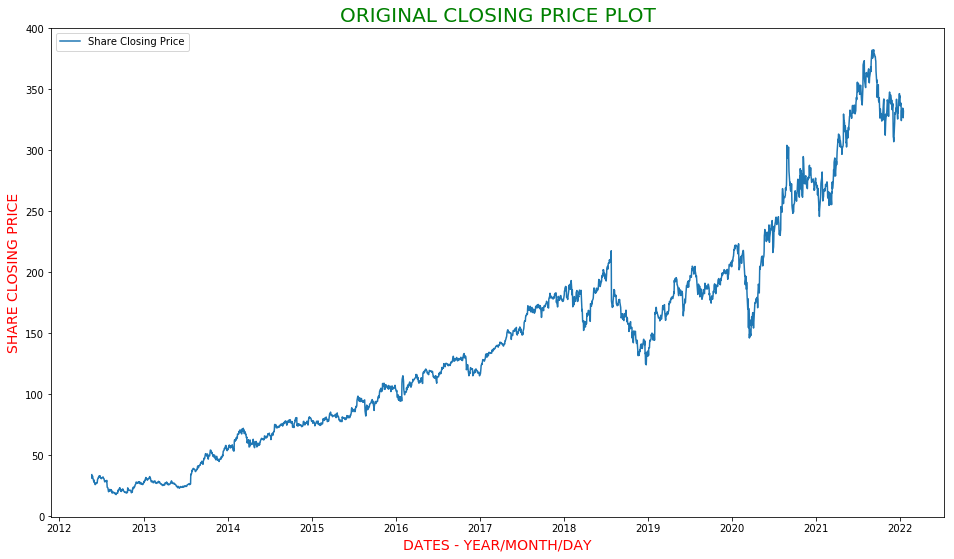

In [6]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#to plot the graph
import matplotlib.pyplot as plt
%matplotlib inline

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df['Close'], label='Share Closing Price')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('ORIGINAL CLOSING PRICE PLOT', fontsize=20, color='g')
ax.legend()

In [7]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
train_data_2 = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     train_data_2['Date'][i] = data['Date'][i]
     train_data_2['Close'][i] = data['Close'][i]

train_data_2.to_csv('FB2_MovingAvgData.csv')
train_data_2.head(10)

,Date,Close
0,2012-05-21 00:00:00,34.03
1,2012-05-22 00:00:00,31
2,2012-05-23 00:00:00,32
3,2012-05-24 00:00:00,33.03
4,2012-05-25 00:00:00,31.91
5,2012-05-29 00:00:00,28.84
6,2012-05-30 00:00:00,28.19
7,2012-05-31 00:00:00,29.6
8,2012-06-01 00:00:00,27.72
9,2012-06-04 00:00:00,26.9


In [8]:
# 1 month prediction
#splitting into train and test
train = train_data_2[:2400]
test = train_data_2[2400:]

train.to_csv('FB_train_MovingAvgTrainData.csv')
test.to_csv('FB_test_MovingAvgValidData.csv')

In [10]:
# Shape Return No of ROWS AND COLUMN OF A DATAFRAME
train_data_2.shape, train.shape, test.shape

((2431, 2), (2400, 2), (31, 2))

In [11]:
# TO Check the First and Last Record Value
train['Date'].min(), train['Date'].max(), test['Date'].min(), test['Date'].max()

(Timestamp('2012-05-21 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2021-12-02 00:00:00'),
 Timestamp('2022-01-14 00:00:00'))

In [13]:
#make predictions
stockclose_preds = []

# range value taken from test.shape
test_shape_no_of_records = 31

for i in range(0,test_shape_noofrecords):
    a = train['Close'][len(train)-test_shape_no_of_records+i:].sum() + sum(stockclose_preds)
    b = a/test_shape_no_of_records
    stockclose_preds.append(b)

In [14]:
date_list = []

date_list = list(test.Date) # TAKE DATE FROM TEST DATA FRAME AND CONVERT IT TO LIST
#print (stcokclose_preds)
#print (date_list)
 
dict = {'Date':date_list,'Predict_Close': stockclose_preds} # CREATE DICTIONARY USING LIST
#print(dict)

predict_df = pd.DataFrame(dict)  #CONVERT DICTIONARY TO DATAFRAME
predict_df.to_csv('FB2_MovingAvgPredictData.csv')

In [18]:
#calculate rmse
#MSE (Mean Squared Error) = np.mean((y_test - y_predtest)**2)
#RMSE (Root Mean Squared Error) = np.sqrt(MSE)

import numpy as np

x = np.power((np.array(test['Close'])-stockclose_preds),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
rmse

8.560924552570764

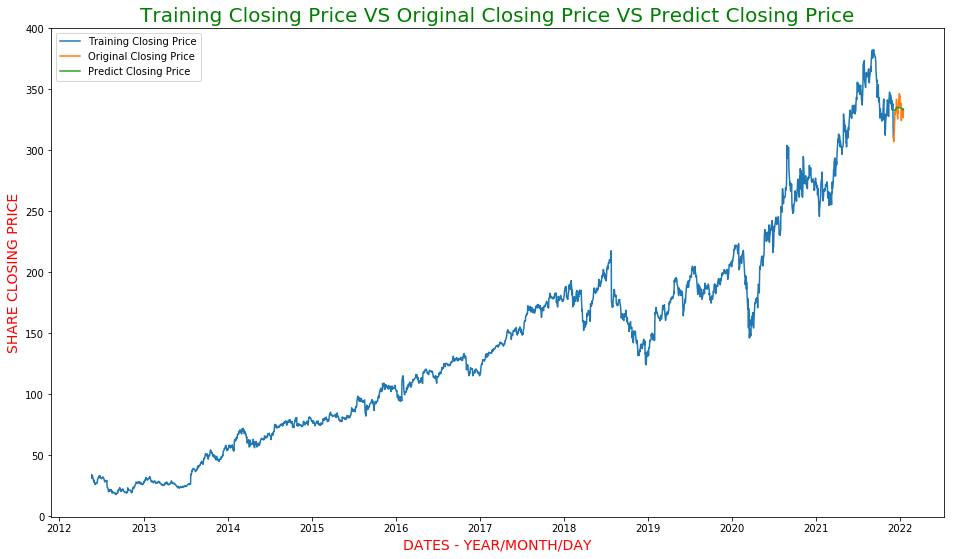

In [16]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(train['Date'],train['Close'],label = 'Training Closing Price')
ax.plot(test['Date'],test['Close'],label = 'Original Closing Price')
ax.plot(predict_df['Date'],predict_df['Predict_Close'],label = 'Predict Closing Price')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Training Closing Price VS Original Closing Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()

In [19]:
from sklearn.metrics import mean_absolute_error

mape = mean_absolute_error(test['Close'], stockclose_preds)*100
print(mape)

582.3759818613888


In [21]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_Predicted))*100
    return mape

print(MAPE(test['Close'],stockclose_preds))

1.7452145821354392
